In [13]:
# Generic imports for the notebook
import os
from helpers import *
from pii_extraction import *
from similarity_comparer import *
from IPython.display import display, HTML, Markdown, Image
from pathlib import Path

## Raw text extraction
The texts below are extracted from the pdf. 

In [14]:
target_pdf = Path("test/data/idcard.pdf")
complete_text = [line for line in extract_text_from_pdf(target_pdf).splitlines() if line.strip()]  # Extract text and remove empty lines

# Display the extracted text
display(Markdown("### Extracted Text from PDF"))
for line in complete_text:
    display(Markdown(f"- {line}"))

### Extracted Text from PDF

- Kopie ID

## Image extraction
The text below is extracted using optimal character recognition from the PDFs.

Using CPU. Note: This module is much faster with a GPU.
/Users/seal/Documents/Projects/pdf-info-scraper/.flox/run/aarch64-darwin.pdf-info-scraper.dev/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


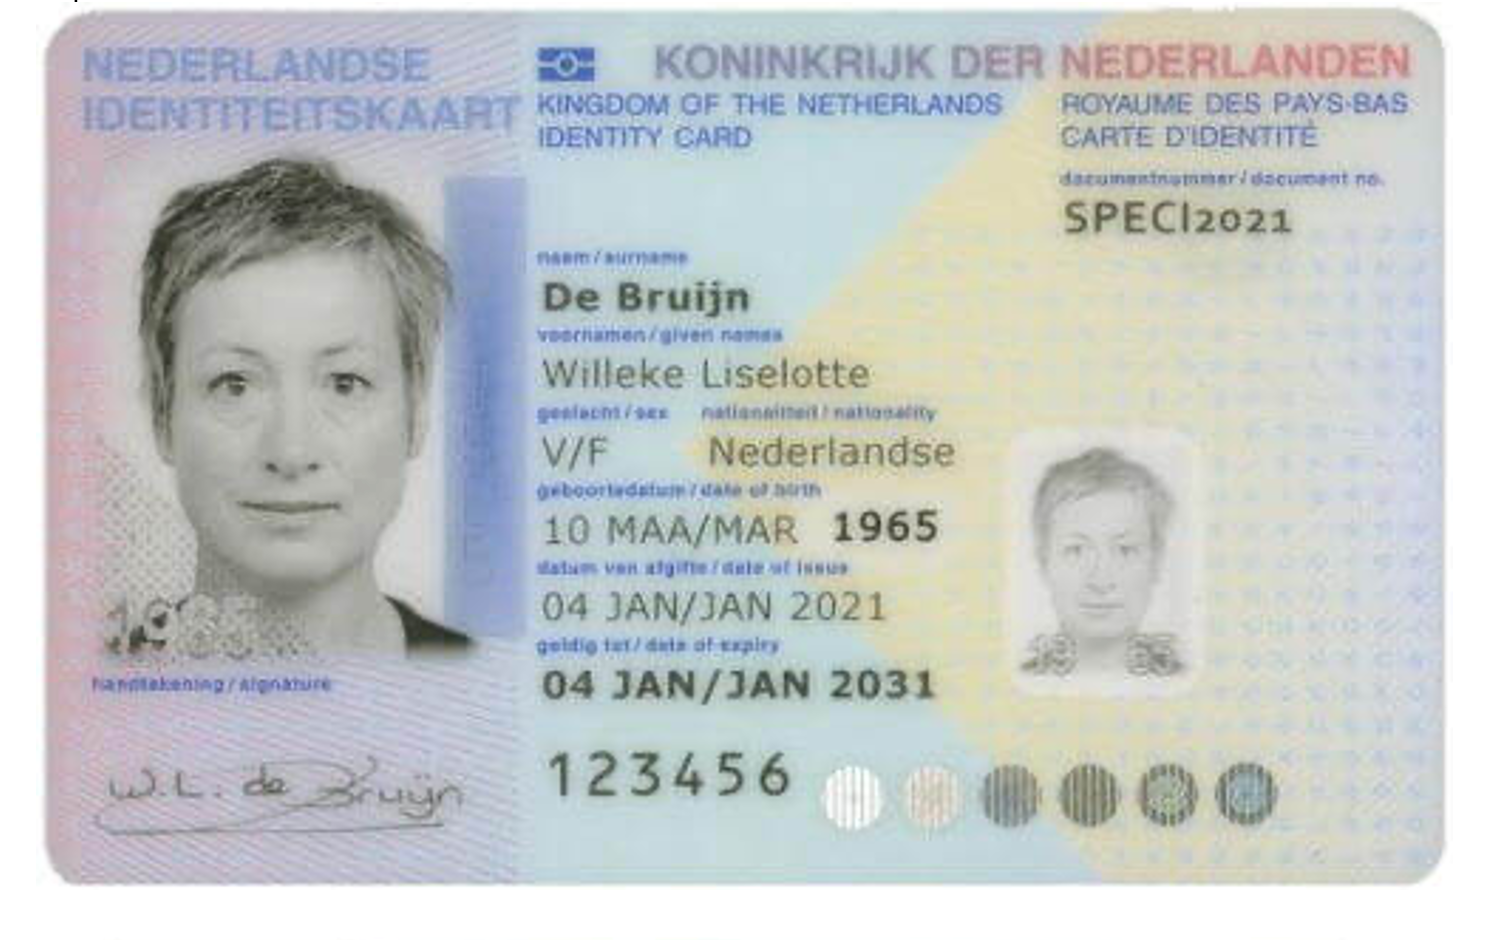

'NEDERLANDSE KONINKRIJK DER NEDERLAnDEN IdentiesskaAHT Kingdom @f The NetherLAndS FoYaUVE Des Pays 865 IDENTITY CaaD CARTE Didentite Mneru3gisrat o SPECI2021 Oabifeuoe De Bruijn Vlemnemga aiven Faig Wılleke Lıselotte Gciblnifser 0iignwieal 00i1u 8in VIF Nederlandse Oploorigdlili(nalo cnn 10 MAA/MAR 1965 ue Ven (ls Guie no 04 JAN/JAN 2021 Osuoiiverraloal, Tanakeniee conrure 04 JAN/JAN 2031 Ue 02 123456 Bu9r'

**Possible idcard-front: similarity score of 1.00%**

Using CPU. Note: This module is much faster with a GPU.
/Users/seal/Documents/Projects/pdf-info-scraper/.flox/run/aarch64-darwin.pdf-info-scraper.dev/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


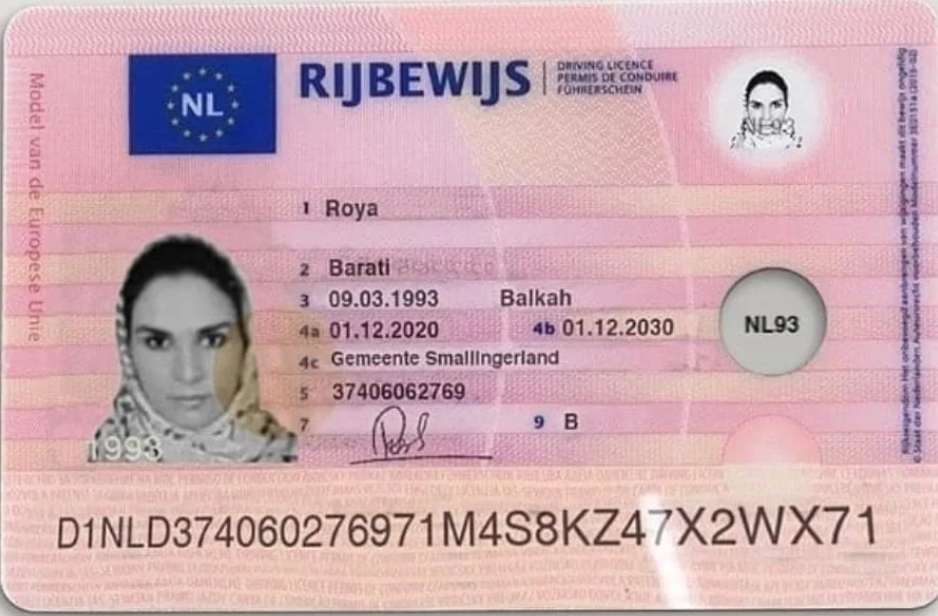

'UeC RIJBEWIS12 #gasarourat   NL 5 5 Roya 1 Barati 09.03.1993 Balkah 01.12.2020 4b 01.12.2030 NL93 Ac Gemcente Smalllngerland 37406062769 998 DINLD374060276971M4S8KZ47X2WX71'

**Possible rijbewijs-front: similarity score of 0.98%**

Using CPU. Note: This module is much faster with a GPU.
/Users/seal/Documents/Projects/pdf-info-scraper/.flox/run/aarch64-darwin.pdf-info-scraper.dev/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


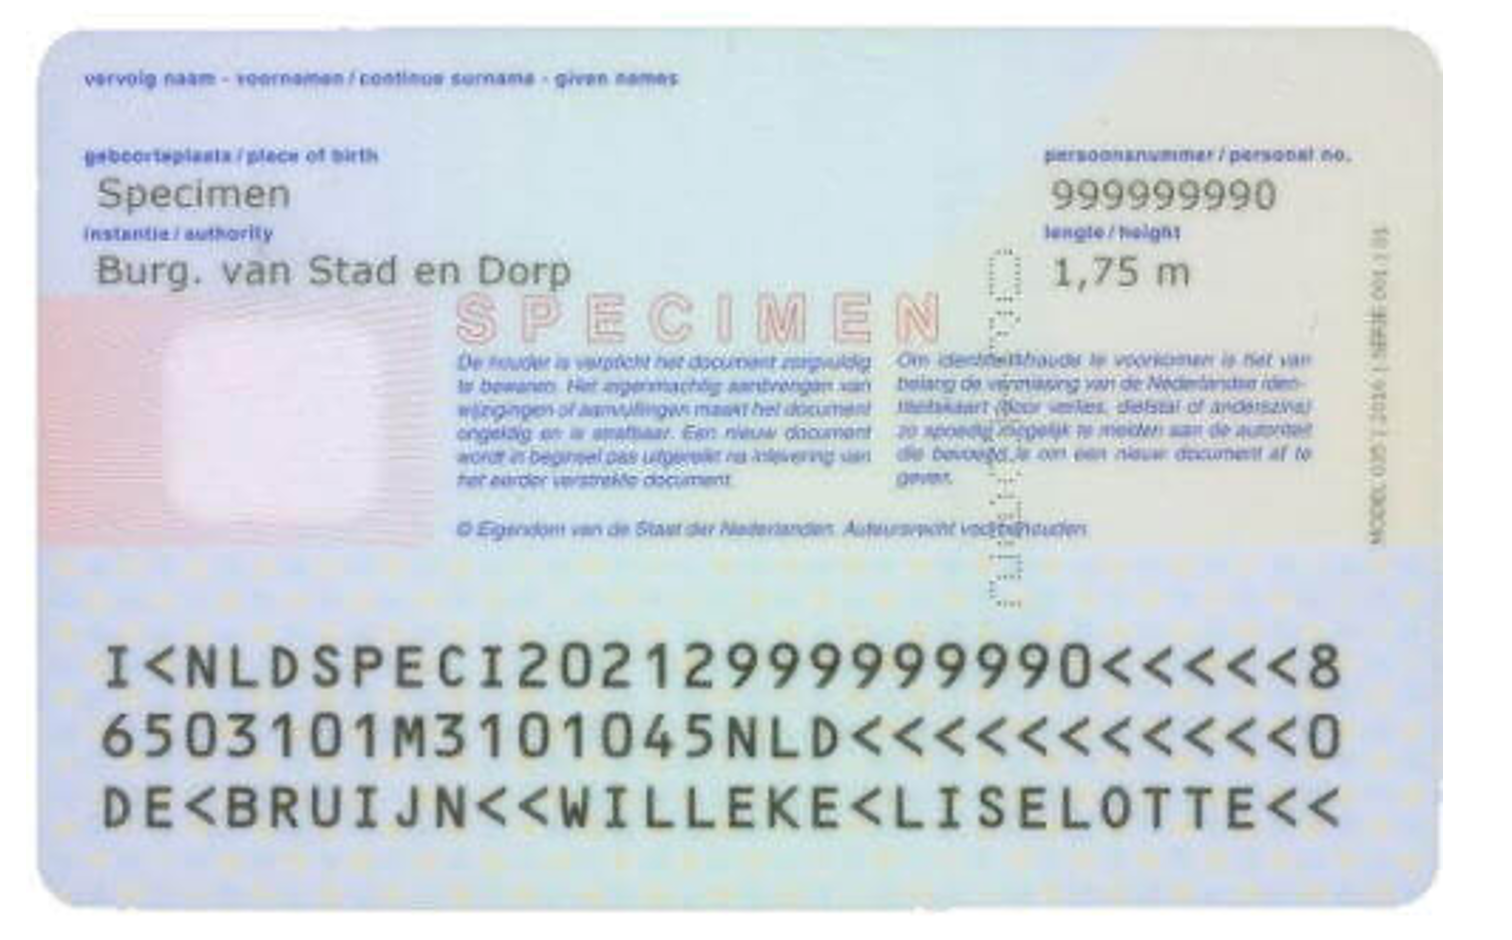

"vofvvonas Pounoeconeug comnang Gren /9n Vsocoriebiebif(Eiecr Mioul 8278oonln ping / D4  odbi 60 Specimen 999999990 Insuniuleo osity ongiorelqn Burg. van Stad en Dorp 1,75 M S PE@ME  OrmAn 'onnon @n '@wuu Jova nei an5 7 nln70 iryynior Mn An D Jiaauie Van  1 Jabuianoeena Qiood Oue3 r Oeqtomi ,eup6uinnAessrnqnnnon I<NLDSPECI20212999999990<<<<<8 6503101M3101045NLD<<<<<<<<<<<o DE<BRUIJN<<WILLEKE<LISELOTTE<<"

**Possible idcard-back: similarity score of 1.00%**

Using CPU. Note: This module is much faster with a GPU.
/Users/seal/Documents/Projects/pdf-info-scraper/.flox/run/aarch64-darwin.pdf-info-scraper.dev/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


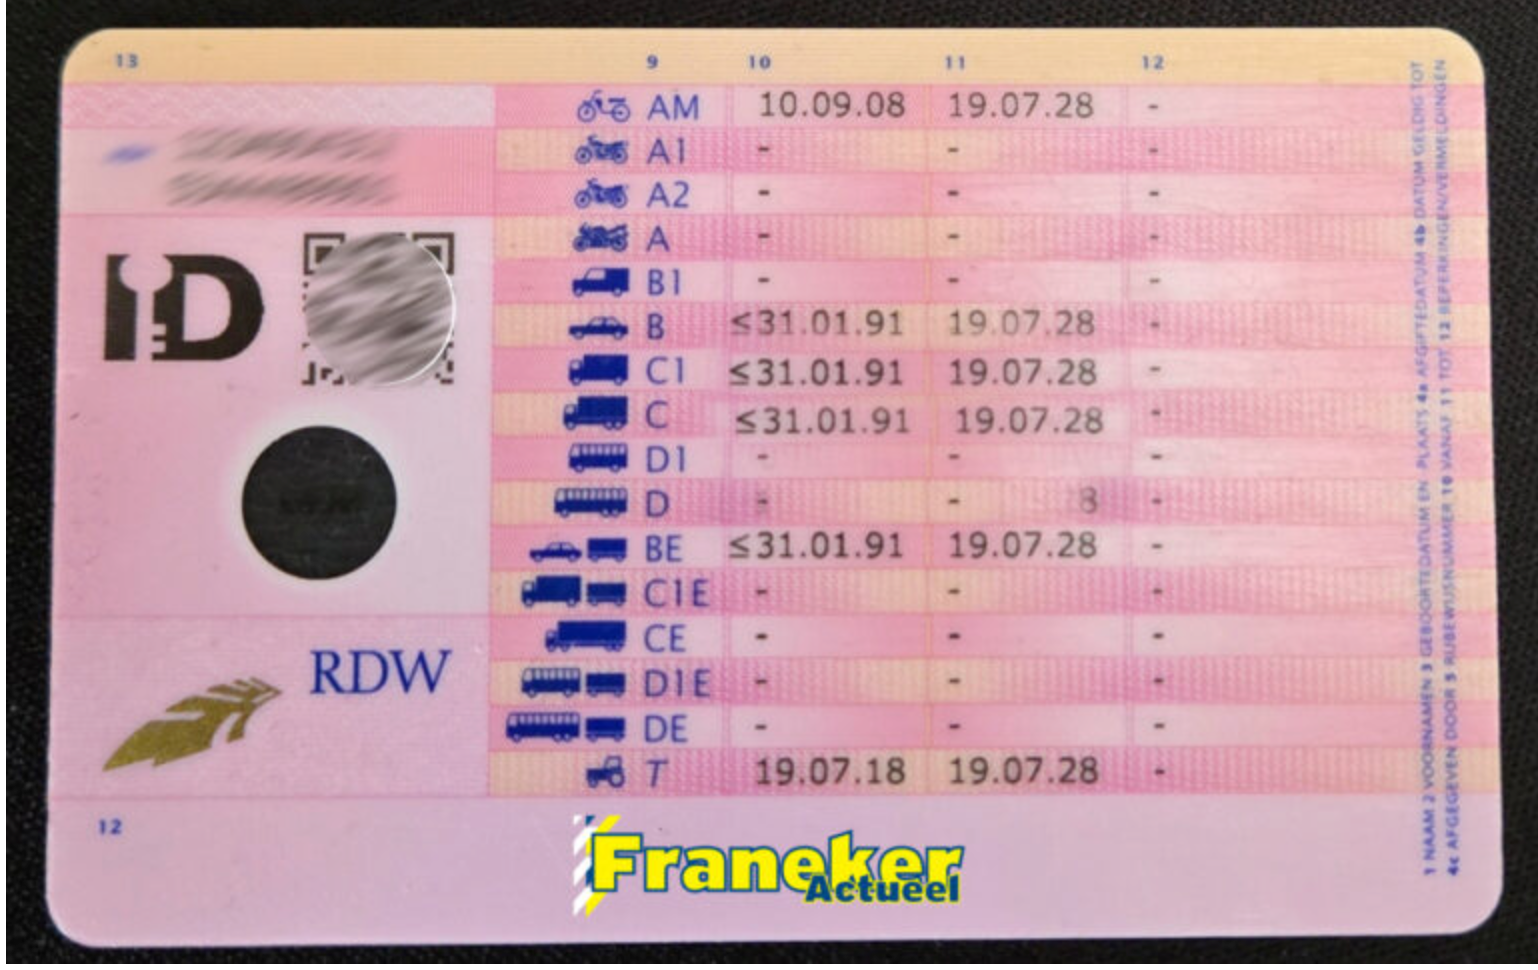

"V0 2 015 AM 10.09.08 19.07.28 6 076 Al 5 A2 A BI ID B <31.,01.91 19 07.28 1 €' 53101.91 19.07.28 DI 0 BE 231.01.91 19.07.28 CIE a CE RDW DIe DE 8 58 T 19.07.18 19.07.28 2 1 1 Franacre"

Using CPU. Note: This module is much faster with a GPU.
/Users/seal/Documents/Projects/pdf-info-scraper/.flox/run/aarch64-darwin.pdf-info-scraper.dev/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


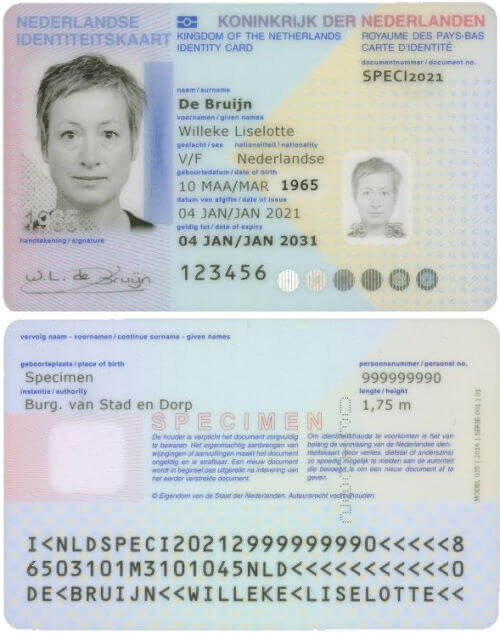

'NEDERLANDSE KONINKRIJK DER NeDERLANDEN Identitefskaaht Kikgdom OftHE NetheaLAnDS FoYAUYE Des Pays 8as IDENTITY CaAD CaRTE DIDENTITE SPECI2021 Bruijn Willeke Liselotte VIF Nederlandse 10 MAA/MAR   1965 04 JANIJAN 2021 un 04 JAN/JAN 2031 U)L 123456 96ul specimen 999999990 Burg van Stad en Dorp 1,75 m SPE €] M @ ( Hfa" Pthnnrana Ora: 6anruy Qioor Utidninduo ~hat 9eanomt ,0 I<NLDSPECI20212999999990<<<<<8 6503101M3101045NLD<<<<<<<<<<<o DE<BRUIJN<<WILLEKE<LISELOTTE<< De'

**Possible idcard: similarity score of 0.88%**

In [ ]:
control_images = {}
for img in Path("test/control/").glob("*.png"):
    control_images[img.stem] = img  # Store control images with their names as keys
for img in Path("test/control/").glob("*.jpg"):
    control_images[img.stem] = img  # Store control images with their names as keys

for i,image in enumerate(extract_images_from_pdf(target_pdf)):
    image_path = os.path.join("test/data", f"{target_pdf.name}_image_{i}.png")
    image.save(image_path)  # Save the image to a file
    image_text = extract_text_from_image(image_path)
    complete_text.append(image_text)  # Append the extracted text from the image
    display(Image(filename=image_path, width=200))  # Display the image with a width
    display(f"{image_text}")

    # Compare found images with possible pii documents
    # for image_name, control_image in control_images.items():
    #     image_similarity = compare_images(image_path, control_image)  # Compare the image with control images
    #     if image_similarity > 0.75:
    #         display(Markdown(f"**Possible {image_name}: similarity score of {image_similarity:.2f}%**"))

    os.remove(image_path)  # Clean up the image file after processing


## Possible Personally Identifyable Information
Below are regex matches on the complete text.

In [16]:
for line in complete_text:
    for t, v in extract_pii(line):
        if t and v:
            display(Markdown(f"**Possible {t} match found:** {v}"))

**Possible postcode match found:** 2021 Oa

**Possible postcode match found:** 1965 ue

**Possible postcode match found:** 2021 Os

**Possible postcode match found:** 2031 Ue

**Possible postcode match found:** 3456 Bu

**Possible phone match found:** ('0', '', '9')

**Possible postcode match found:** 1993 Ba

**Possible postcode match found:** 2030 NL

**Possible bsn match found:** 374060627

**Possible bsn match found:** 374060276

**Possible postcode match found:** 8278oo

**Possible postcode match found:** 9990 In

**Possible postcode match found:** 1045NL

**Possible bsn match found:** 999999990

**Possible bsn match found:** 202129999

**Possible postcode match found:** 2021 Br

**Possible postcode match found:** 2021 un

**Possible postcode match found:** 9990 Bu

**Possible postcode match found:** 1045NL

**Possible bsn match found:** 999999990

**Possible bsn match found:** 202129999